In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from matplotlib.pyplot import figure
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
def vis_reconstruction_error(dataframe, no_features, first_feature, last_feature, thresholds_mean):
    fig, axes = plt.subplots(no_features, 1, figsize=(10,6), dpi=200)
    ax = axes.ravel()
    columns = dataframe.columns
    t = dataframe.iloc[:,0]
    for i in range(first_feature, last_feature):
        sns.scatterplot(data=dataframe, 
                     x=t, 
                     y=dataframe.iloc[:, i+4],
                     ax=ax[i-first_feature],
                     color="black",
                     linewidth=0.2,
                     s = 4,
                     label="Euclidean Distance \n between $y$ and $\hat{y}$")
        
        ax[i-first_feature].axhline(thresholds_mean[i-first_feature], 
                                    color="red", 
                                    linestyle ="-", 
                                    linewidth=2,
                                    label="threshold")
        
        # Set labels etc. 
        ax[i-1].legend(loc='center left', 
                       bbox_to_anchor=(1, 0.5),
                       fancybox=True, 
                       shadow=True, 
                       ncol=1,
                       prop={'size': 8})
        ax[i-1].set_xlabel("time [in s]")
        ax[i-1].set_ylabel("reconstruction error")
        ax[i-1].set_title("Sensor No.{}".format(i))
        ax[i-first_feature].set_xlim(0, 10000)  

## Predicted Data

In [4]:
artifical_data = pd.read_csv("../../files/classification/MSE/artfic_mean_plus_80percent.csv", sep=";")
training_set = artifical_data.iloc[:10000,:]
subset = artifical_data.iloc[10000:,:]

## Reconstruction Error during Training

In [58]:
thresholds_training_mean = [0.13679444326055645, 0.5441877437706729]

In [59]:
thresholds_training = [i*1.8 for i in thresholds_training_mean]

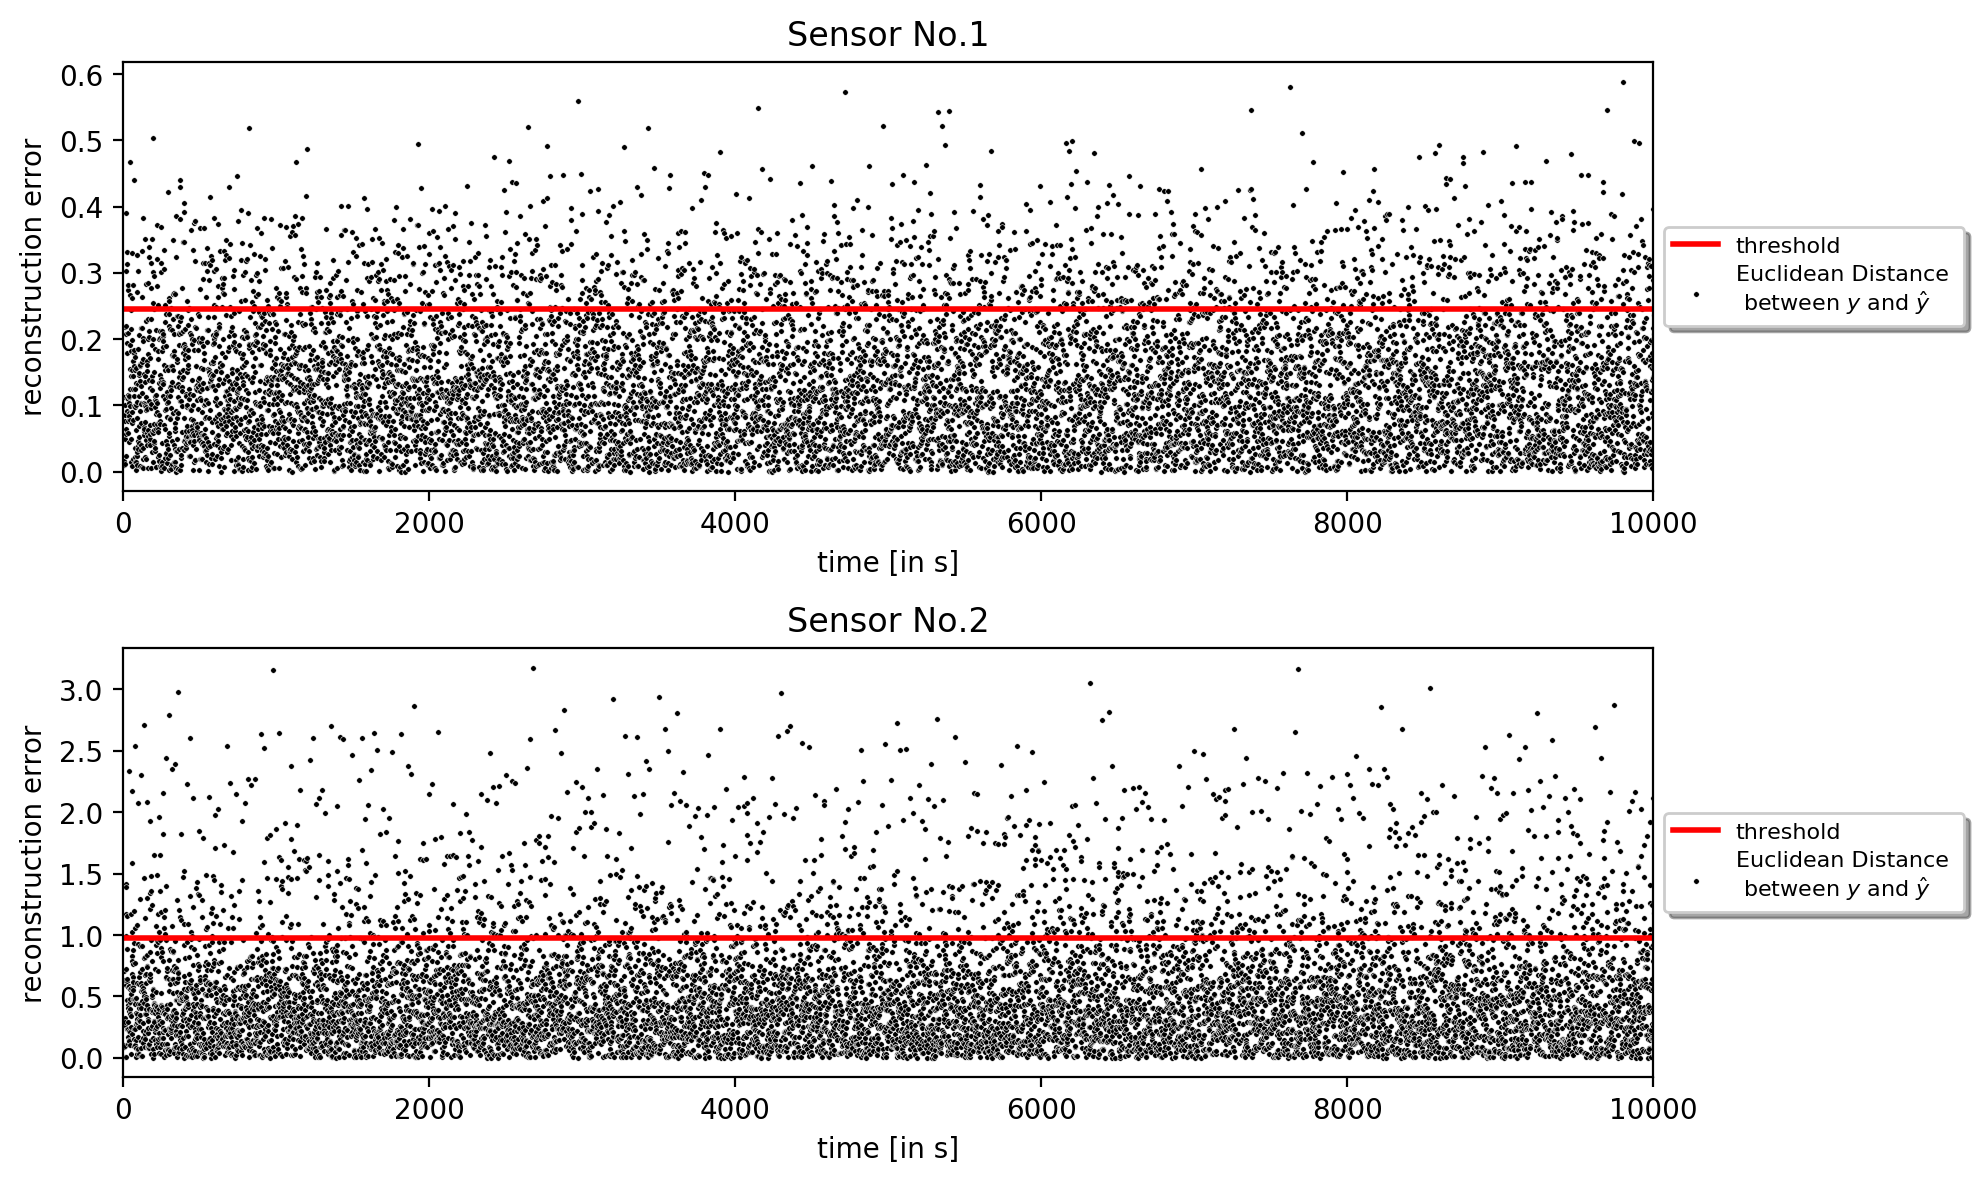

In [62]:
vis_reconstruction_error(dataframe=training_set, 
                         no_features=2, 
                         first_feature=1, 
                         last_feature=3, 
                         thresholds_mean=thresholds_training)
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/re_artfic.png")
plt.show()

# Visualisation of Prediction 

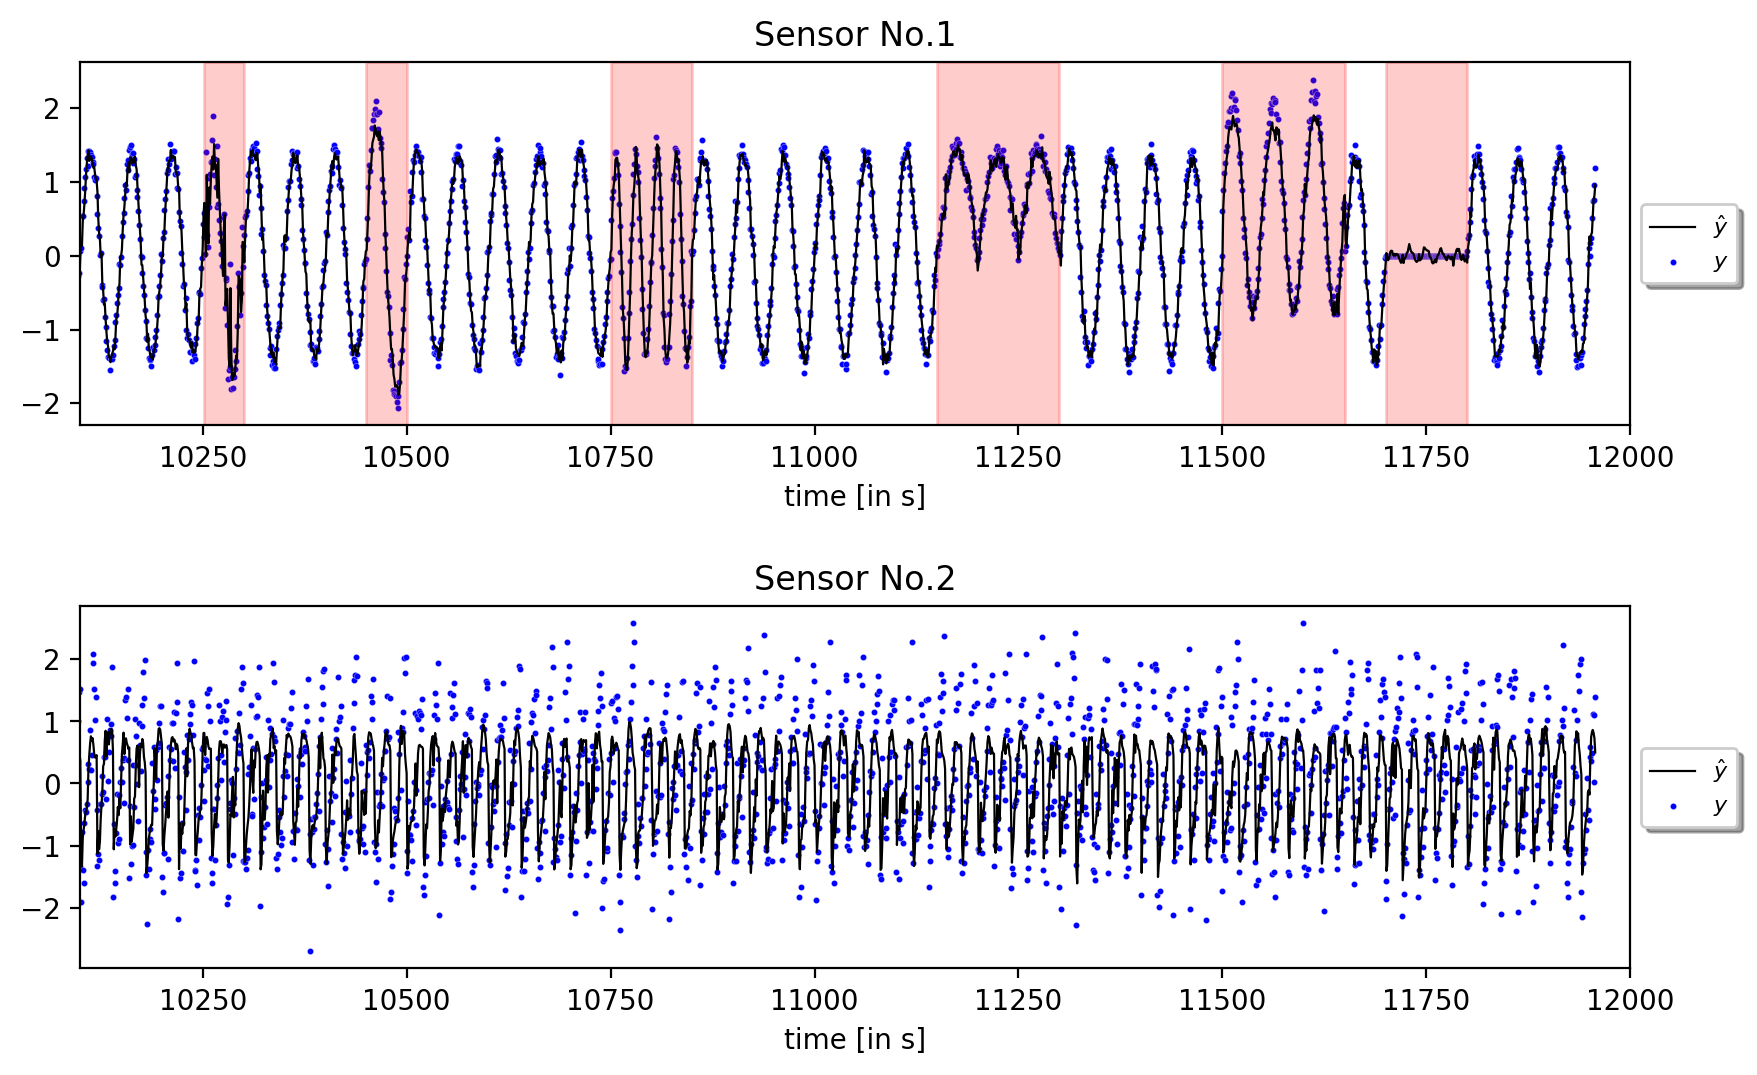

In [50]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):    
    # Predicted sensor values
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i+2],
                 ax=ax[i-1], 
                 color="black",
                 label="$\hat{y}$",
                 linewidth=.8)
    
    # Target sensor values (actual sensor values)
    sns.scatterplot(data=subset, 
                    x=t, 
                    y=columns[i],
                    ax=ax[i-1],
                    color="blue",
                    label="$y$",
                    s=5,
                    linewidth=.1)
                 
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')

    # Set labels etc. 
    ax[i-1].legend(loc='center left', 
                   bbox_to_anchor=(1, 0.5),
                   fancybox=True, 
                   shadow=True, 
                   ncol=1,
                   prop={'size': 8})
    ax[i-1].set_xlabel("time [in s]")
    ax[i-1].set_ylabel("")
    ax[i-1].set_title("Sensor No.{}".format(i))
    ax[i-1].set_xlim(10100, 12000)

plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/pred_artfic.png")
plt.show()

# Visualisation of Classification 

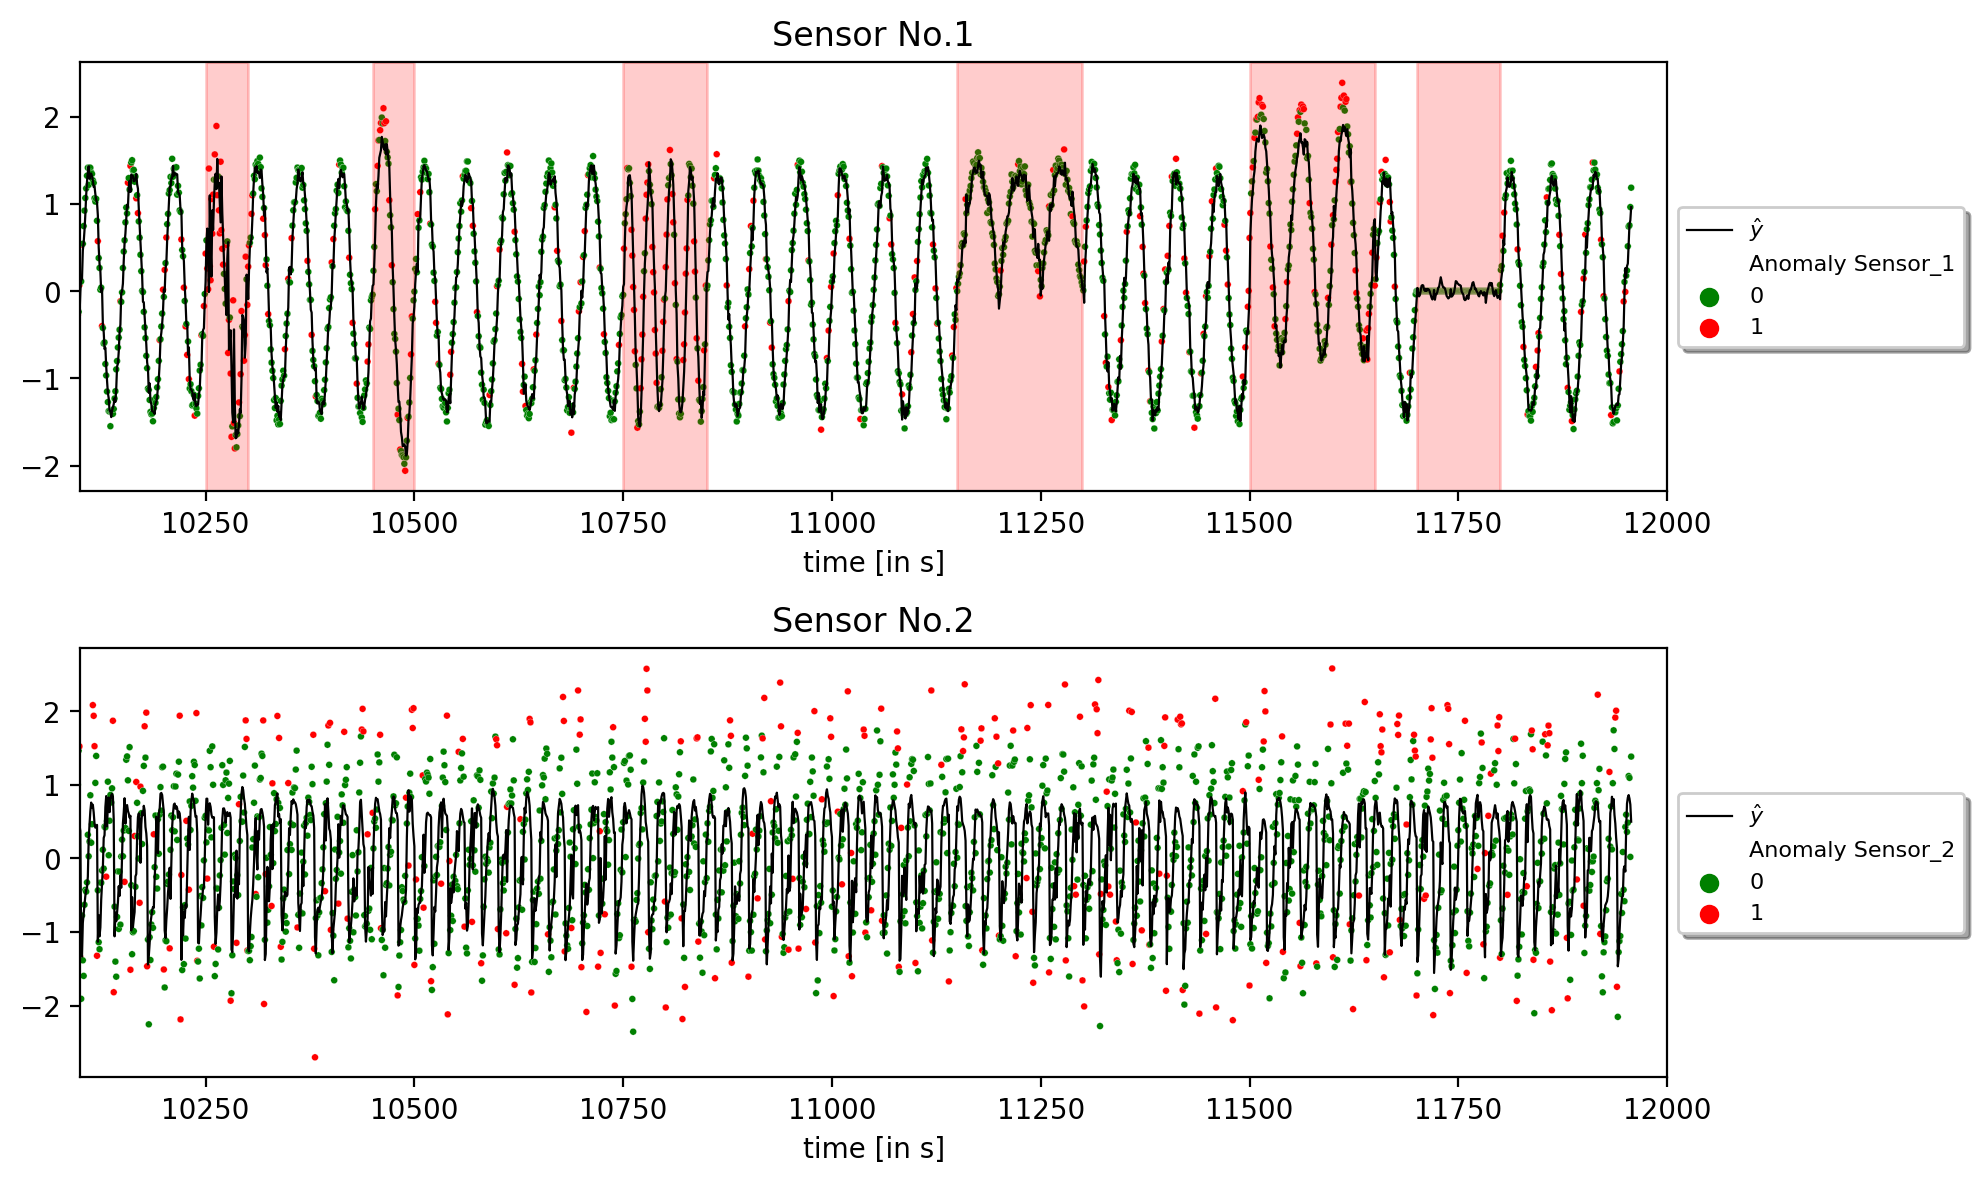

In [56]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):
    # Values about appearance of anomaly 
    palette = []
    anomaly_label = subset.iloc[:, i+6].values
    if 0 in anomaly_label and 1 not in anomaly_label:
        palette = ["green"]
    elif 1 in anomaly_label and 0 not in anomaly_label:
        palette = ["red"]
    elif 0 in anomaly_label and 1 in anomaly_label:
        palette = ["green","red"]
    
    # Predicted mu
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i+2],
                 ax=ax[i-1], 
                 color="black",
                 label="$\hat{y}$",
                 linewidth=.8)
    
    # Target sensor values (actual sensor values)
    sns.scatterplot(data=subset, 
                    x=t, 
                    y=columns[i],
                    ax=ax[i-1], 
                    hue=columns[i+6], 
                    palette=palette,
                    s=6,
                    linewidth=.1,
                    label="")
    if i == 1:  
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')
        
    # Set labels etc. 
    ax[i-1].legend(loc='center left', 
                   bbox_to_anchor=(1, 0.5),
                   fancybox=True, 
                   shadow=True, 
                   ncol=1,
                   prop={'size': 8})
    ax[i-1].set_xlabel("time [in s]")
    ax[i-1].set_ylabel("")
    ax[i-1].set_title("Sensor No.{}".format(i))
    ax[i-1].set_xlim(10100, 12000)
    
plt.subplots_adjust(hspace=0.5)
plt.tight_layout(pad=1)
plt.savefig("./pictures/classific_artfic.png")
plt.show()

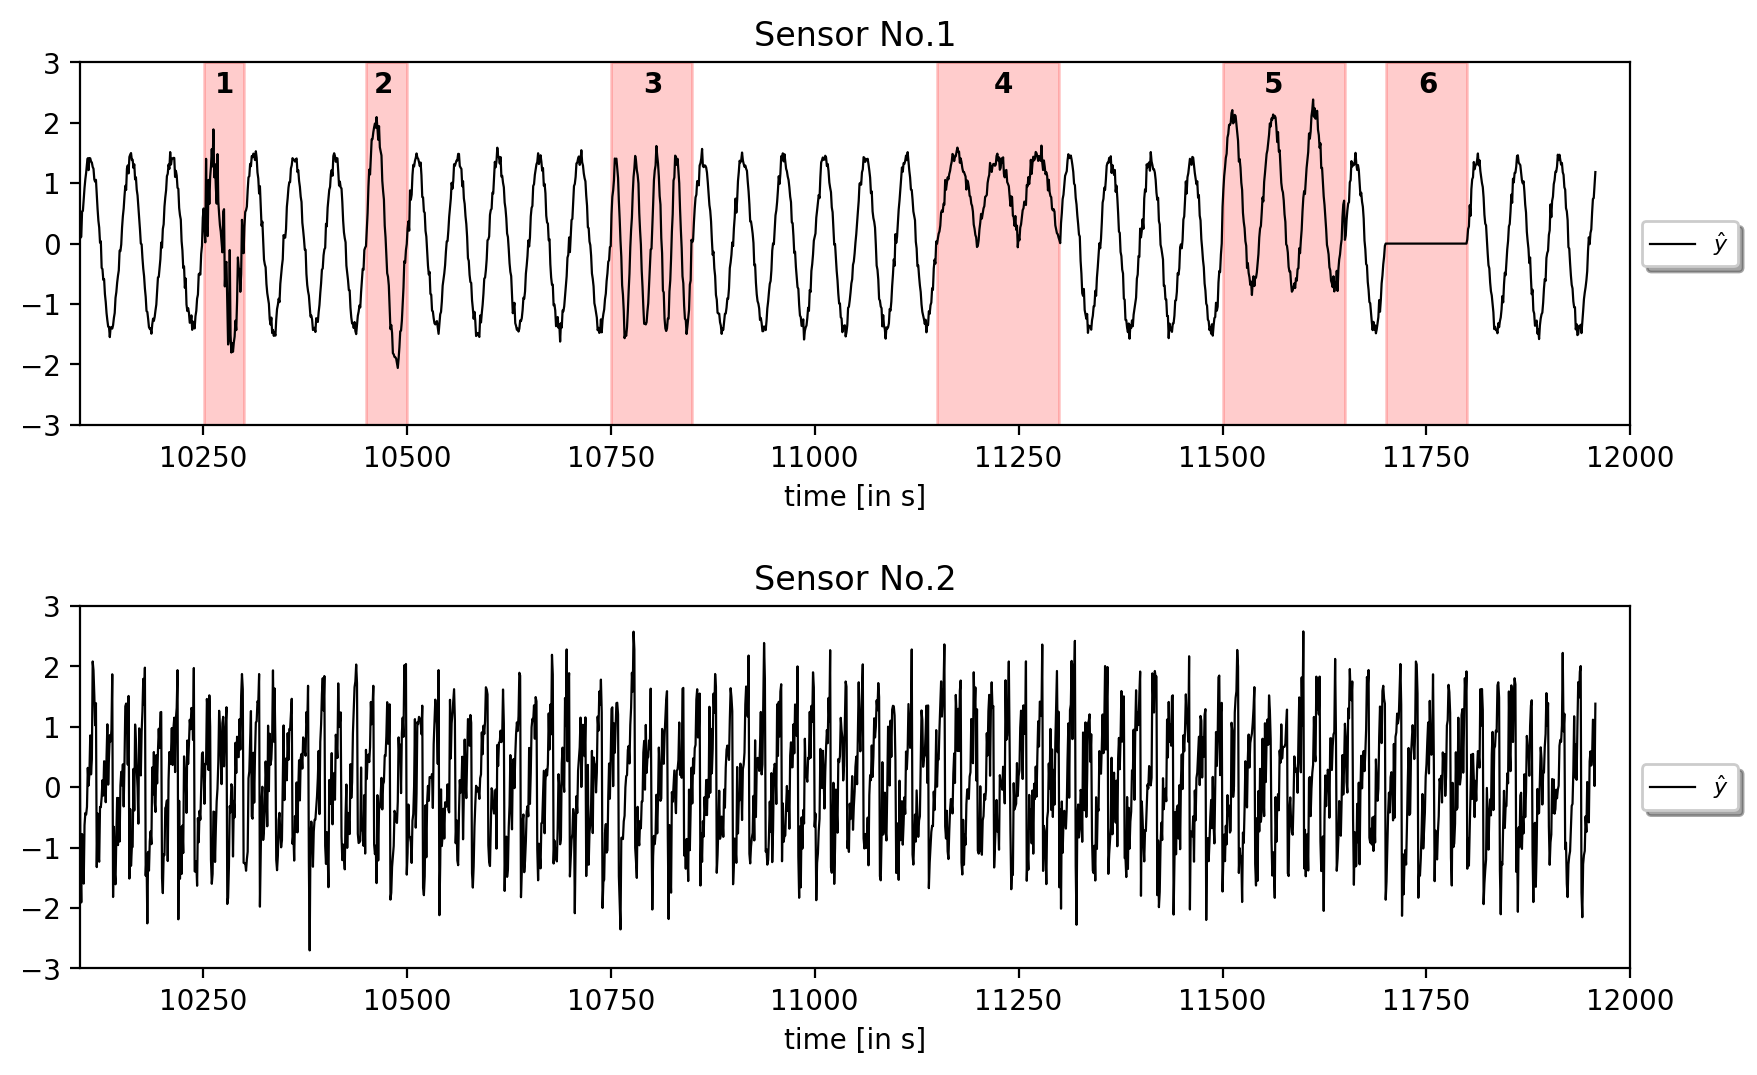

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):    
    # Predicted sensor values
    sns.lineplot(data=subset, 
                 x=t, 
                 y=columns[i],
                 ax=ax[i-1], 
                 color="black",
                 label="$\hat{y}$",
                 linewidth=.8)
                 
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')
        
        ax[i-1].text(10265,2.5, "1",fontweight='bold')
        ax[i-1].text(10460,2.5, "2",fontweight='bold')
        ax[i-1].text(10790,2.5, "3",fontweight='bold')
        ax[i-1].text(11220,2.5, "4",fontweight='bold')
        ax[i-1].text(11550,2.5, "5",fontweight='bold')
        ax[i-1].text(11740,2.5, "6",fontweight='bold')
        

    # Set labels etc. 
    ax[i-1].legend(loc='center left', 
                   bbox_to_anchor=(1, 0.5),
                   fancybox=True, 
                   shadow=True, 
                   ncol=1,
                   prop={'size': 8})
    ax[i-1].set_xlabel("time [in s]")
    ax[i-1].set_ylabel("")
    ax[i-1].set_title("Sensor No.{}".format(i))
    ax[i-1].set_xlim(10100, 12000)
    ax[i-1].set_ylim(-3, 3)

plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/numbers.png")
plt.show()